1. Menginstall library split folder untuk mempermudah memecah dataset

2. Mengimport Library yang akan digunakan

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
print(tf.__version__)

2.12.0


3. Download Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = '/content/drive/MyDrive/'

Mounted at /content/drive


4. Mengekstrak data yang sudah di download

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/drive/MyDrive/jerawat.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


5. Indexing Folder ke dalam variabel

In [ ]:
import os
base_dir = '/content/jerawat'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir, 'papula')
pap_dir = os.path.join(base_dir, 'pustula')
nod_dir = os.path.join(base_dir, 'nodul')
# brs_dir = os.path.join(base_dir, 'bersih')
cys_dir = os.path.join(base_dir, 'cystic')
bnt_dir = os.path.join(base_dir, 'bruntusan')
bop_dir = os.path.join(base_dir, 'bopeng')
kht_dir = os.path.join(base_dir, 'komedo_hitam')
khp_dir = os.path.join(base_dir, 'komedo_putih')

In [ ]:
train_roc = os.path.join(train_dir, 'papula')
train_pap = os.path.join(train_dir, 'pustula')
train_nod = os.path.join(train_dir, 'nodul')
# train_brs = os.path.join(train_dir, 'bersih')
train_cys = os.path.join(train_dir, 'cystic')
train_bnt = os.path.join(train_dir, 'bruntusan')
train_bop = os.path.join(train_dir, 'bopeng')
train_kht = os.path.join(train_dir, 'komedo_hitam')
train_khp = os.path.join(train_dir, 'komedo_putih')


val_roc = os.path.join(validation_dir, 'papula')
val_pap = os.path.join(validation_dir, 'pustula')
val_nod = os.path.join(validation_dir, 'nodul')
# val_brs = os.path.join(validation_dir, 'bersih')
val_cys = os.path.join(validation_dir, 'cystic')
val_bnt = os.path.join(validation_dir, 'bruntusan')
val_bop = os.path.join(validation_dir, 'bopeng')
val_kht = os.path.join(validation_dir, 'komedo_hitam')
val_khp = os.path.join(validation_dir, 'komedo_putih')


In [ ]:
os.listdir('/content/jerawat/train')

['komedo_putih',
 'bopeng',
 'komedo_hitam',
 'pustula',
 'cystic',
 'papula',
 'bruntusan',
 'nodul']

In [ ]:
os.listdir('/content/jerawat/val')

['komedo_putih',
 'bopeng',
 'komedo_hitam',
 'pustula',
 'cystic',
 'papula',
 'bruntusan',
 'nodul']

6. Memecah data set yang sudah ada dengan rasio 40% dari total data.

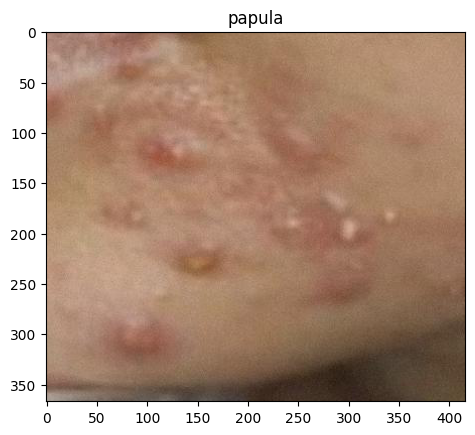

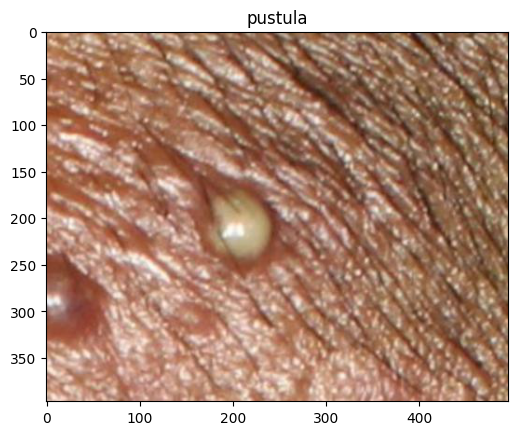

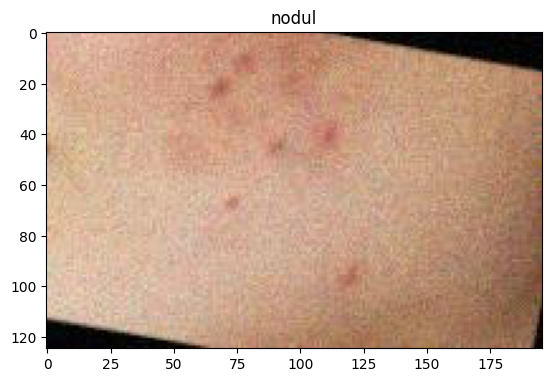

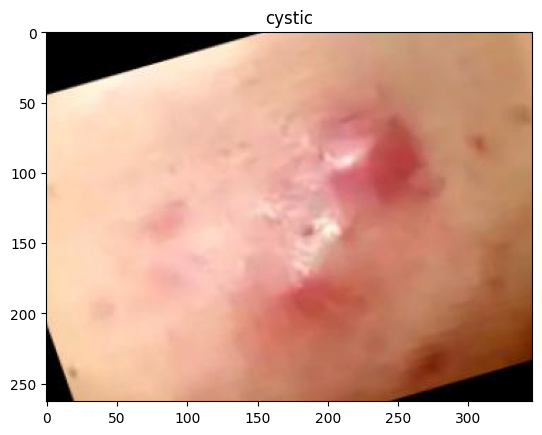

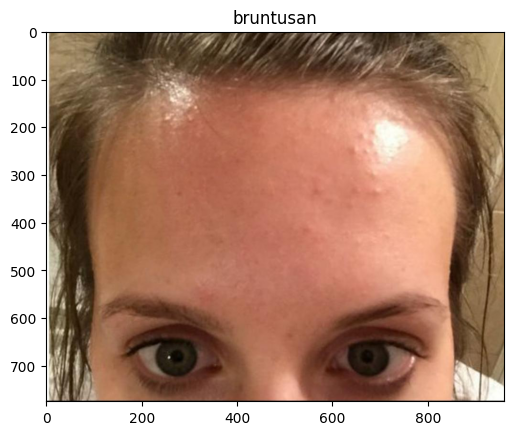

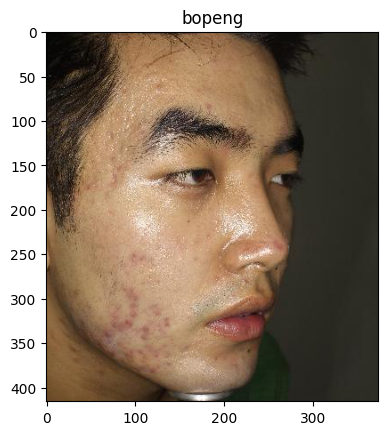

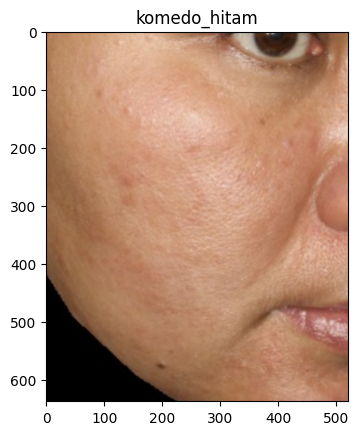

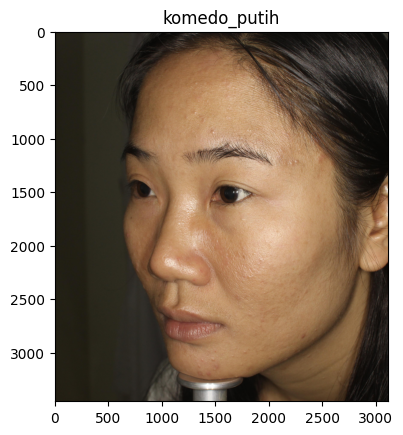

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directories for each class
class_directories = [val_roc, val_pap, val_nod, val_cys, val_bnt, val_bop, val_kht, val_khp]

# Iterate over each class directory and display a random image
for class_dir in class_directories:
    class_name = os.path.basename(class_dir)
    random_image = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, random_image)
    
    # Display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(class_name)
    plt.show()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
tf.compat.v1.reset_default_graph()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(base_model)


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

In [ ]:
# Flatten the output from VGG19
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Conv2D, Flatten, Dense

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(8, activation='softmax'))

7. Membuat Training dari dataset yang sudah ada.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# train_datagen = ImageDataGenerator(
#                      rescale = 1/255,
#                   rotation_range = 40,
#                   width_shift_range = 0.2,
#                   height_shift_range = 0.2,
#                   shear_range = 0.2,
#                   zoom_range = 0.2,
#                   horizontal_flip = True,
#                   fill_mode = "nearest")
 
# test_datagen = ImageDataGenerator(
#                     rescale = 1./225,
#                     rotation_range = 20,
#                     horizontal_flip = True,
#                     vertical_flip = True,
#                     shear_range = 0.2,
#                     fill_mode = 'nearest')

# train_datagen = 0
# test_datagen = 0

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./225)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=32,
        
        class_mode='categorical'
        )
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

print(validation_generator.class_indices)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
{'bopeng': 0, 'bruntusan': 1, 'cystic': 2, 'komedo_hitam': 3, 'komedo_putih': 4, 'nodul': 5, 'papula': 6, 'pustula': 7}


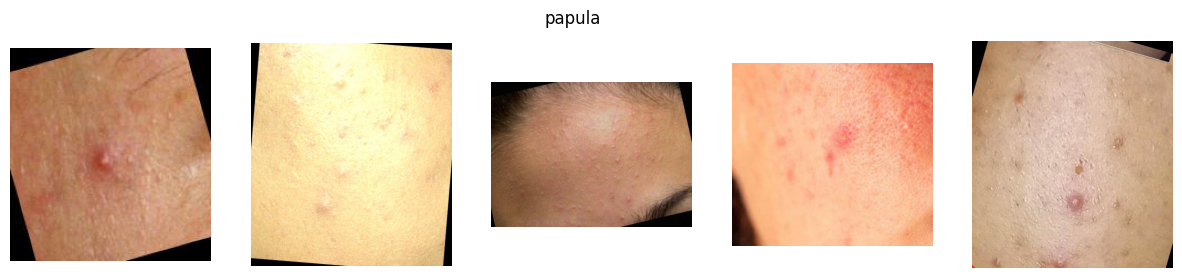

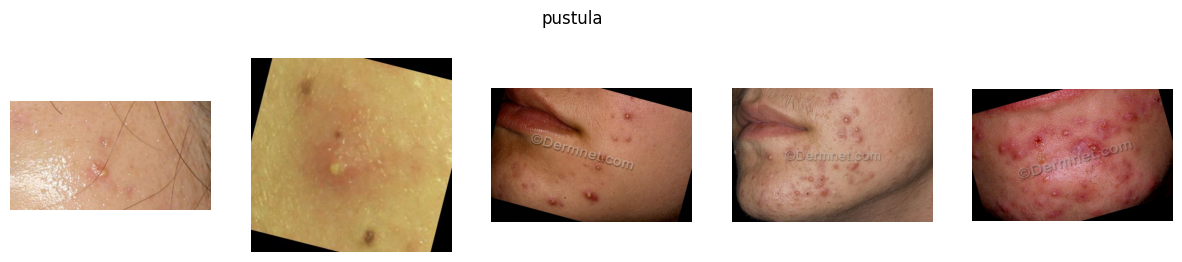

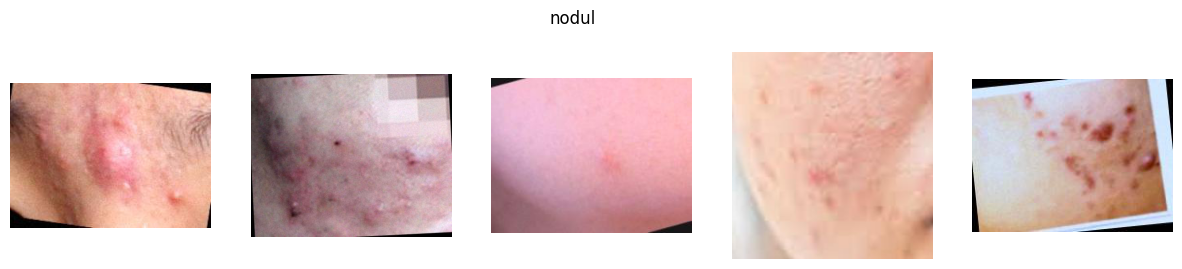

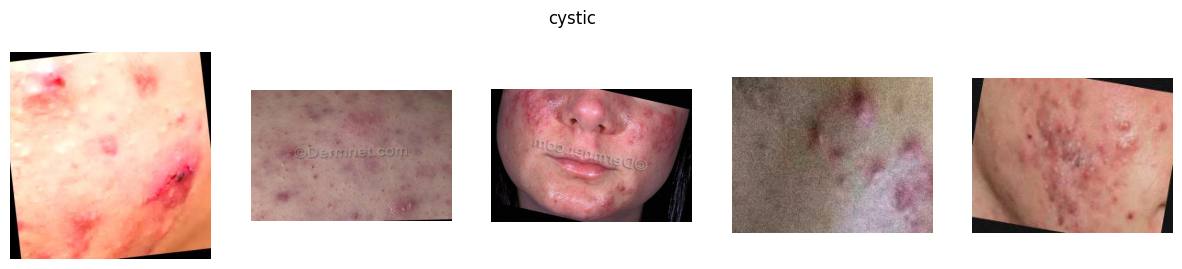

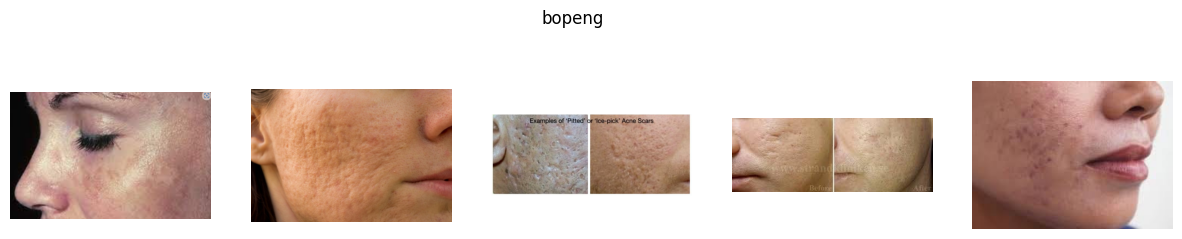

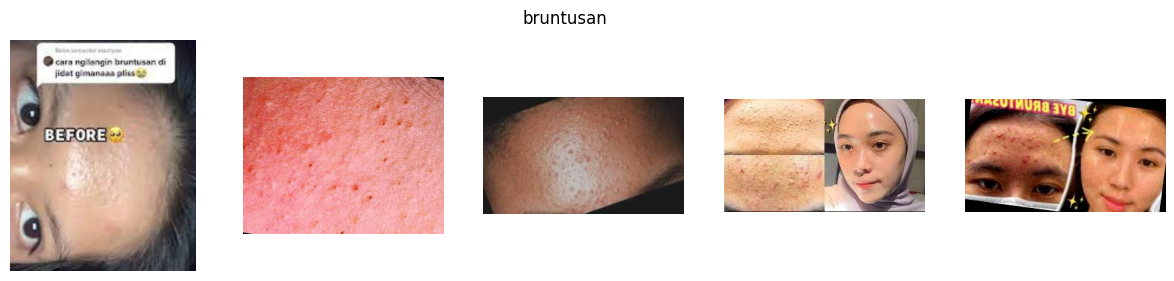

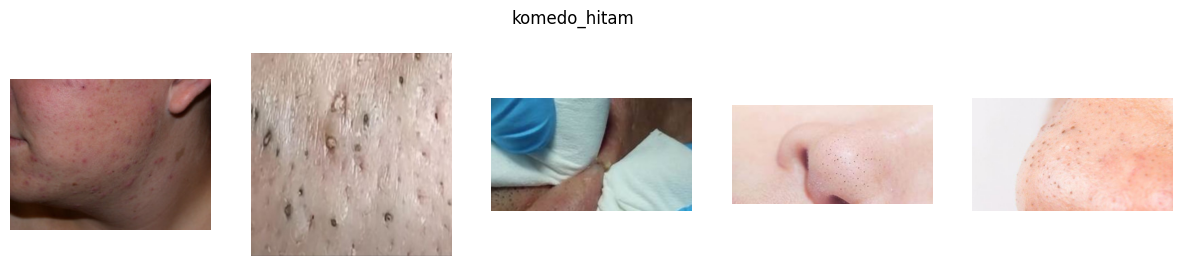

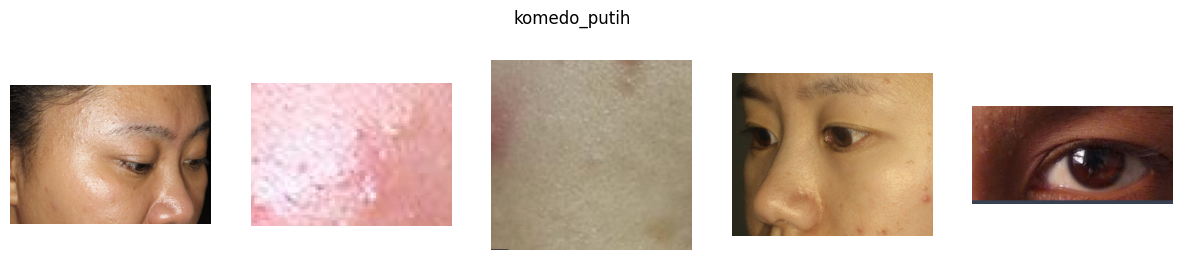

In [ ]:
class_names = ['papula', 'pustula', 'nodul', 'cystic', 'bopeng', 'bruntusan', 'komedo_hitam', 'komedo_putih']

# Iterate over each class
for class_name in class_names:
    class_dir = os.path.join(validation_dir, class_name)
    images = os.listdir(class_dir)
    
    # Display random images from the class
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(class_name)
    random.shuffle(images)
    
    for i in range(5):
        img_path = os.path.join(class_dir, images[i])
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    
    plt.show()

8. Pembuatan model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 1024)              32769024  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                        

9. Membuat stop ketika akurasi sudah menyentuh 97% agar model tidak overfitting dan mempengaruhi keakuratan.

In [ ]:
class stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("Akurasi sudah cukup")
      self.model.stop_training = True

stops = stop()

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

10. Training Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 500,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [stop()]
)

Epoch 1/500
25/25 - 22s - loss: 6.9597 - accuracy: 0.2350 - val_loss: 2.4127 - val_accuracy: 0.3250 - 22s/epoch - 863ms/step
Epoch 2/500
25/25 - 8s - loss: 1.8384 - accuracy: 0.3913 - val_loss: 1.3524 - val_accuracy: 0.4625 - 8s/epoch - 321ms/step
Epoch 3/500
25/25 - 5s - loss: 1.2097 - accuracy: 0.5550 - val_loss: 1.1230 - val_accuracy: 0.5437 - 5s/epoch - 216ms/step
Epoch 4/500
25/25 - 7s - loss: 1.0811 - accuracy: 0.6225 - val_loss: 1.3547 - val_accuracy: 0.4938 - 7s/epoch - 297ms/step
Epoch 5/500
25/25 - 6s - loss: 0.8227 - accuracy: 0.7025 - val_loss: 1.0996 - val_accuracy: 0.6062 - 6s/epoch - 237ms/step
Epoch 6/500
25/25 - 7s - loss: 0.7658 - accuracy: 0.7362 - val_loss: 1.0743 - val_accuracy: 0.5938 - 7s/epoch - 272ms/step
Epoch 7/500
25/25 - 7s - loss: 0.6680 - accuracy: 0.7500 - val_loss: 1.1391 - val_accuracy: 0.5750 - 7s/epoch - 290ms/step
Epoch 8/500
25/25 - 7s - loss: 0.6185 - accuracy: 0.7950 - val_loss: 1.0506 - val_accuracy: 0.5938 - 7s/epoch - 281ms/step
Epoch 9/500
25

11. Visualisasi Akurasi

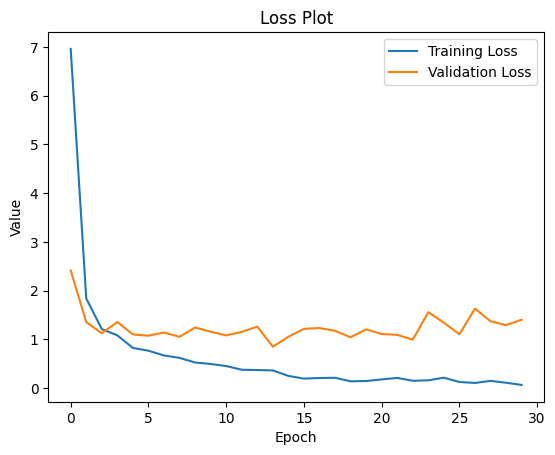

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()
#Hasilnya sangat signifikan dikarenakan saya hanya melakukan 2 epoch saat training

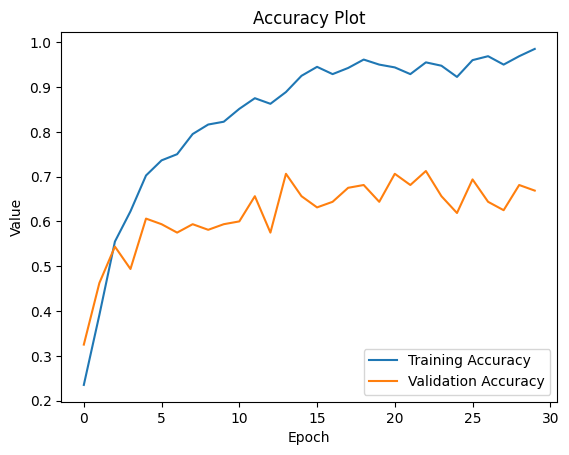

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()
#Hasilnya sangat signifikan dikarenakan saya hanya melakukan 2 epoch saat training

12. Output Data

FileNotFoundError: ignored

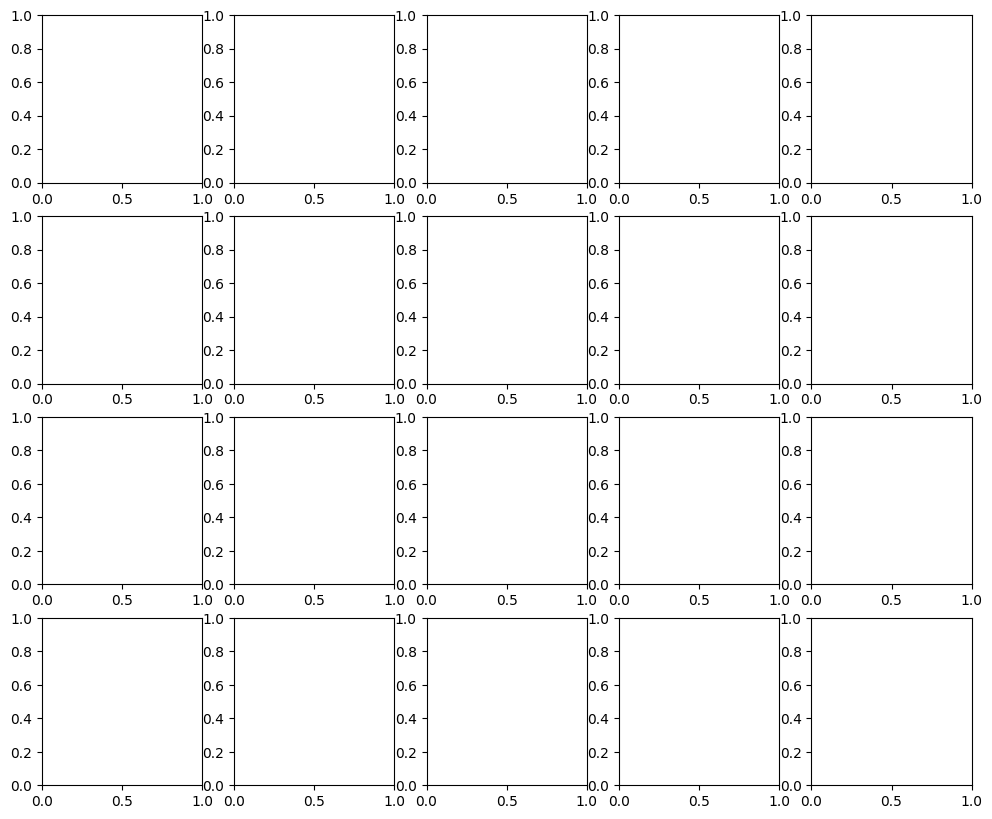

In [ ]:
from tensorflow import keras
from PIL import Image

base_dir = '/content/jerawat'
validation_dir = os.path.join(base_dir, 'val')

# List the class folders in the validation directory
class_folders = os.listdir(validation_dir)

# Create a list to store the paths of random images
random_images = []

# Choose 20 random images from the validation directory (4 images per class)
num_samples_per_class = 4
for class_folder in class_folders:
    class_folder_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_folder_path):
        image_files = os.listdir(class_folder_path)
        random_images.extend(random.sample(image_files, num_samples_per_class))

# Create a 4x5 grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(12, 10))

# Iterate over the subplots, predict the labels, and display the images
for i, ax in enumerate(axes.flat):
    image_path = os.path.join(validation_dir, random_images[i])
    image = Image.open(image_path)
    image = image.resize((150, 150))  # Resize the image if needed
    image = image.convert('RGB')  # Convert image to RGB mode
    image_array = keras.preprocessing.image.img_to_array(image)
    image_array = image_array / 255.0  # Normalize the image
    image_array = image_array.reshape((1, ) + image_array.shape)  # Reshape for the model input
    prediction = model.predict(image_array)
    predicted_label = prediction.argmax()
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'Label: {predicted_label}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the collage of images with predicted labels
plt.show()


In [ ]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

# for fn in uploaded.keys():

#   path = fn 
#   img = tf.keras.utils.load_img(path, target_size =(150,150))
#   imgplot = plt.imshow(img)
#   x = tf.keras.utils.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)

#   print(fn)
#   print(classes)
#   if classes[0,0]!=0:
#     print('panu')
#   elif classes[0,1]!=0:
#     print('papula')
#   elif classes[0, 2] != 0:
#     print('pustula')
#   else:
#     print('nodul')

class_names = ['bopeng', 'bruntusan', 'cystic', 'komedo_hitam', 'komedo_putih', 'nodul', 'papula', 'pustula']


for fn in uploaded.keys():
    path = fn 
    img = tf.keras.utils.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    print(classes)

    # Menentukan kelas dengan probabilitas tertinggi
    highest_prob_index = np.argmax(classes[0])
    predicted_class = class_names[highest_prob_index]

    # Menghitung persentase untuk setiap kelas
    percentages = classes[0] * 100

    # Menampilkan hasil dengan persentase
    for i in range(len(class_names)):
        print(f'{class_names[i]}: {percentages[i]:.2f}%')

    print('Predicted class:', predicted_class)


In [ ]:
model.save("model.h5")

In [ ]:
import pickle

# ... Train and compile your model ...

# Save the model as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
